Тема “Обучение без учителя”
Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [19]:
from sklearn.datasets import load_boston
import pandas as pd

In [20]:
boston = load_boston()

In [21]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
data = boston.data

In [23]:
feature_names = boston.feature_names

In [24]:
x = pd.DataFrame(data, columns=feature_names)

In [25]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [27]:
price = boston.target

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x, price, test_size=0.3, random_state = 7)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Масштабирование признаков


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
x_train_scaled = scaler.fit_transform(x_train)

In [36]:
x_test_scaled = scaler.transform(x_test)

In [37]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names)

In [38]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

Применеие TSNE

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [42]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

In [43]:
x_train_tsne

array([[ 26.869205  ,  -8.81917   ],
       [ 10.168224  ,  -3.6549602 ],
       [ 36.45279   , -13.719215  ],
       [ 37.46264   , -12.690545  ],
       [ 24.143944  , -12.866518  ],
       [ -3.6683934 , -10.133095  ],
       [ -4.0764155 , -12.5878    ],
       [-12.589147  ,   6.9489865 ],
       [-13.031749  ,  16.246     ],
       [ 28.17853   , -18.435862  ],
       [-10.659762  ,  12.729528  ],
       [ 24.675234  ,  -8.931879  ],
       [ -3.399029  ,   5.1438437 ],
       [-10.666058  ,  17.900982  ],
       [ 36.753525  , -14.805414  ],
       [-13.317644  ,  20.678585  ],
       [ -8.530816  ,   2.1181228 ],
       [ 36.55406   , -15.472886  ],
       [-13.959219  ,  14.891839  ],
       [ 27.650583  , -12.424658  ],
       [  9.443262  ,  -1.6983263 ],
       [ -7.80393   ,  -3.602411  ],
       [-10.993274  ,  15.560025  ],
       [-14.412467  ,  20.423235  ],
       [ 37.718613  , -13.153073  ],
       [ -8.73551   ,  -4.874193  ],
       [ 23.404127  , -13.934767  ],
 

In [46]:
x_train_tsne.shape

(354, 2)

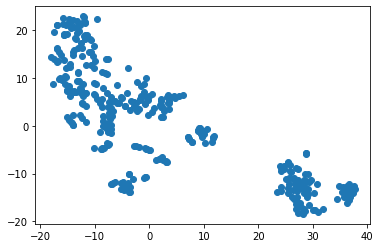

In [49]:
import matplotlib.pyplot as plt
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1])
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

In [52]:
labels_train = kmeans.fit_predict(x_train_scaled)

In [53]:
pd.value_counts(labels_train)

0    180
1    113
2     61
dtype: int64

In [54]:
label_test = kmeans.predict(x_test_scaled)

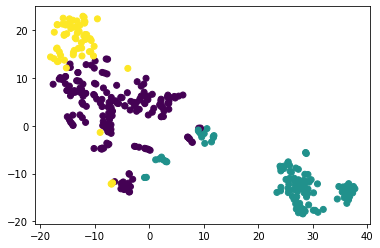

In [58]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:,1], c=labels_train)
plt.show()


In [63]:
y_train.mean()

22.595762711864406

In [76]:
# Кластер 0 = средняя цена
y_train[labels_train==0].mean()

24.410555555555554

In [77]:
## Кластер 1 = средняя цена
y_train[labels_train==1].mean()

16.00353982300885

In [79]:
# Кластер 2 = средняя цена
y_train[labels_train==2].mean()

29.452459016393444

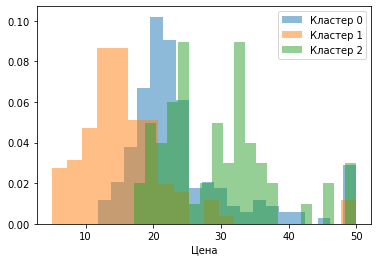

In [126]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.show()

In [80]:
# Кластер 0  - кол-во преступлений % на душу населения
x_train.loc[labels_train==0, 'CRIM'].mean()

0.3647895555555555

In [81]:
# Кластер 1 - кол-во преступлений % на душу населения
x_train.loc[labels_train==1, 'CRIM'].mean()

9.711018407079646

In [75]:
# Кластер 2 - кол-во преступлений % на душу населения
x_train.loc[labels_train==2, 'CRIM'].mean()

0.06710524590163933

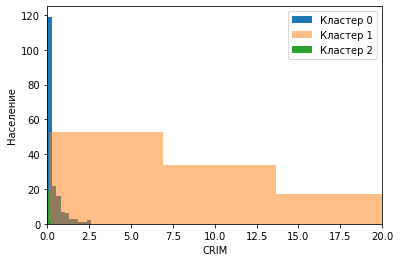

In [114]:
plt.hist(x_train.loc[labels_train==0, 'CRIM'], bins = 10, alpha=1)
plt.hist(x_train.loc[labels_train==1, 'CRIM'], bins = 10, alpha=0.5)
plt.hist(x_train.loc[labels_train==2, 'CRIM'], bins = 10, alpha=1)
plt.xlim(0, 20)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')
plt.ylabel('Население')
plt.show()

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [130]:
label_test = kmeans.predict(x_test_scaled)

In [131]:
# # Кластер 0 Средняя цена
y_test[label_test == 0].mean()

34.1625

In [132]:
# Кластер 0  - кол-во преступлений % на душу населения
x_test.loc[label_test == 0, 'CRIM'].mean()

0.46247750000000004

In [133]:
# # Кластер 1 Средняя цена
y_test[label_test == 1].mean()

19.894166666666667

In [134]:
# Кластер 1  - кол-во преступлений % на душу населения
x_test.loc[label_test == 1, 'CRIM'].mean()

5.173034583333332

In [135]:
# # Кластер 2 Средняя цена
y_test[label_test == 2].mean()

24.4375

In [136]:
# Кластер 2  - кол-во преступлений % на душу населения
x_test.loc[label_test == 2, 'CRIM'].mean()

3.6848362500000005

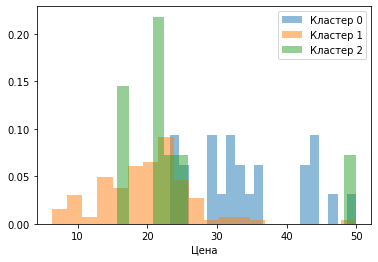

In [137]:
plt.hist(y_test[label_test==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[label_test==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[label_test==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.show()